# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#define the unit to metric
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | saint-francois
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | havelock
Processing Record 8 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | bennington
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | coruripe
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | sakakah
Processing Record 17 of Set 1 | kutum
Processing Record 18 of Set 1 | lebanon
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set

Processing Record 41 of Set 4 | sabang
Processing Record 42 of Set 4 | nouadhibou
Processing Record 43 of Set 4 | mwinilunga
Processing Record 44 of Set 4 | madingou
Processing Record 45 of Set 4 | silver city
Processing Record 46 of Set 4 | esmeralda
Processing Record 47 of Set 4 | katsuura
Processing Record 48 of Set 4 | aklavik
Processing Record 49 of Set 4 | ammon
Processing Record 0 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 1 of Set 5 | wanning
Processing Record 2 of Set 5 | kyabe
Processing Record 3 of Set 5 | santa rosa
Processing Record 4 of Set 5 | san juan de colon
Processing Record 5 of Set 5 | skjervoy
Processing Record 6 of Set 5 | northam
Processing Record 7 of Set 5 | manaure
Processing Record 8 of Set 5 | mitsamiouli
Processing Record 9 of Set 5 | grindavik
Processing Record 10 of Set 5 | sawakin
Processing Record 11 of Set 5 | biak
Processing Record 12 of Set 5 | kununurra
Processing Record 13 of Set 5 | ribeira brava
Processing Record 14 o

Processing Record 24 of Set 8 | jinchang
Processing Record 25 of Set 8 | hanmer springs
Processing Record 26 of Set 8 | orotukan
Processing Record 27 of Set 8 | fukuma
Processing Record 28 of Set 8 | vardo
Processing Record 29 of Set 8 | la tijera
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | chastoozerye
City not found. Skipping...
Processing Record 32 of Set 8 | meulaboh
Processing Record 33 of Set 8 | marzuq
Processing Record 34 of Set 8 | tongchuan
Processing Record 35 of Set 8 | marsh harbour
Processing Record 36 of Set 8 | dibrugarh
Processing Record 37 of Set 8 | iqaluit
Processing Record 38 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 39 of Set 8 | apodi
Processing Record 40 of Set 8 | houston
Processing Record 41 of Set 8 | sergeyevka
Processing Record 42 of Set 8 | belaya gora
Processing Record 43 of Set 8 | belmonte
Processing Record 44 of Set 8 | ihiala
Processing Record 45 of Set 8 | luau
Processing Record 46 of S

Processing Record 11 of Set 12 | hualmay
Processing Record 12 of Set 12 | anisoc
Processing Record 13 of Set 12 | bam
Processing Record 14 of Set 12 | buqayq
City not found. Skipping...
Processing Record 15 of Set 12 | balclutha
Processing Record 16 of Set 12 | monzon
Processing Record 17 of Set 12 | nouakchott
Processing Record 18 of Set 12 | ndele
Processing Record 19 of Set 12 | tromso
Processing Record 20 of Set 12 | oistins
Processing Record 21 of Set 12 | waitati
Processing Record 22 of Set 12 | qaqortoq
Processing Record 23 of Set 12 | dese
Processing Record 24 of Set 12 | naze
Processing Record 25 of Set 12 | karratha
Processing Record 26 of Set 12 | klyuchi
Processing Record 27 of Set 12 | vikhorevka
Processing Record 28 of Set 12 | ketchikan
Processing Record 29 of Set 12 | torbat-e jam
Processing Record 30 of Set 12 | changli
Processing Record 31 of Set 12 | stabat
Processing Record 32 of Set 12 | kaduy
Processing Record 33 of Set 12 | tarko-sale
Processing Record 34 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-francois,46.4154,3.9054,-5.74,93,1,1.54,FR,1675828515
1,avarua,-21.2078,-159.7750,29.03,70,46,5.14,CK,1675828516
2,albany,42.6001,-73.9662,2.93,78,81,0.89,US,1675828265
3,leningradskiy,69.3833,178.4167,-31.97,95,100,2.13,RU,1675828518
4,ilulissat,69.2167,-51.1000,-26.99,76,40,3.09,GL,1675828518


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-francois,46.4154,3.9054,-5.74,93,1,1.54,FR,1675828515
1,avarua,-21.2078,-159.7750,29.03,70,46,5.14,CK,1675828516
2,albany,42.6001,-73.9662,2.93,78,81,0.89,US,1675828265
3,leningradskiy,69.3833,178.4167,-31.97,95,100,2.13,RU,1675828518
4,ilulissat,69.2167,-51.1000,-26.99,76,40,3.09,GL,1675828518


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

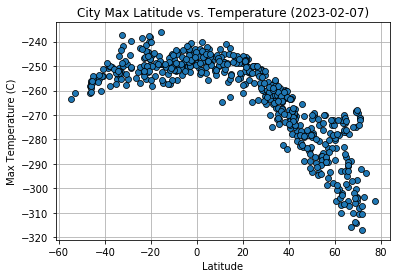

In [9]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"]-273.15, #converting the temperature from Kelvin to Celcius
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

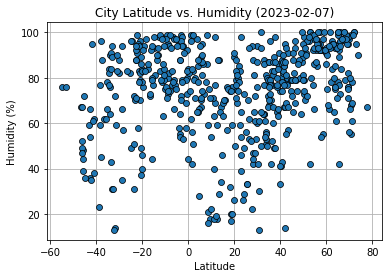

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

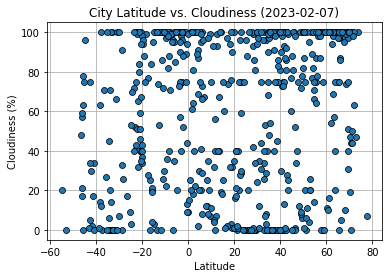

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

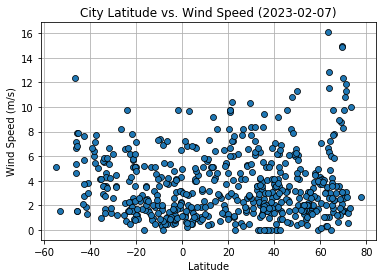

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-francois,46.4154,3.9054,-5.74,93,1,1.54,FR,1675828515
2,albany,42.6001,-73.9662,2.93,78,81,0.89,US,1675828265
3,leningradskiy,69.3833,178.4167,-31.97,95,100,2.13,RU,1675828518
4,ilulissat,69.2167,-51.1000,-26.99,76,40,3.09,GL,1675828518
5,havelock,34.8791,-76.9013,12.19,77,0,1.54,US,1675828320


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,29.03,70,46,5.14,CK,1675828516
7,hobart,-42.8794,147.3294,16.92,66,75,5.66,AU,1675828496
10,coruripe,-10.1256,-36.1756,24.69,75,100,3.55,BR,1675828521
11,rikitea,-23.1203,-134.9692,26.55,70,52,4.00,PF,1675828335
15,ushuaia,-54.8000,-68.3000,9.81,76,20,5.14,AR,1675828478


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7684366332070898


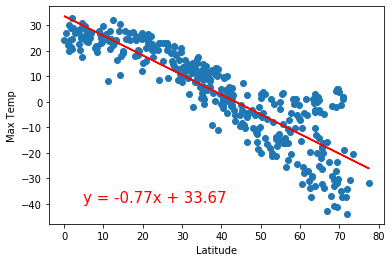

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.2400530021872054


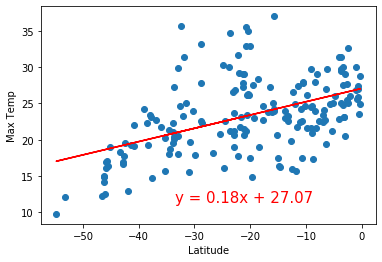

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship:** 

Northern Hemisphere: 
 - The relationship between latitude and max tempuratures displays a strong negative correlation.
 - The r-value is ~ 0.77 (rounded up)
 - Max temperature drops as the latitude increases.

Southern Hemisphere: 
  - The relationship between latitude and max tempuratures displays a weak positive correlation.
  - The r-value is 0.24 
  - Need further analysis considering the other factors to arrive at the correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15398404018732156


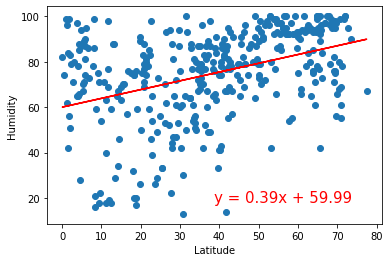

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.16190715317083276


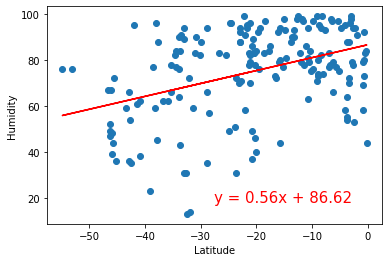

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:** 
Northern Hemisphere: 
 - The relationship between latitude and humidity displays a too weak positive correlation.
 - The r-value is ~ 0.15 (rounded up)

Southern Hemisphere: 
 - The relationship between latitude and humidity displays a too weak positive correlation.
 - The r-value is ~ 0.16 (rounded up)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0565109208158407


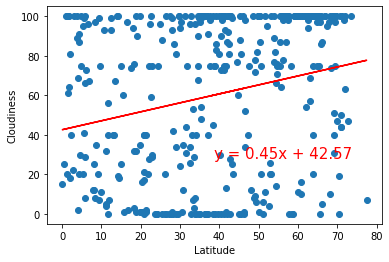

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.18878264783842905


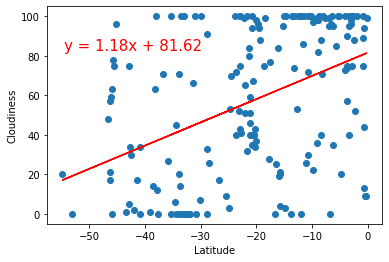

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

**Discussion about the linear relationship:**

Northern Hemisphere: 
 - There is no correlation between Latitude and Cloudliness
 - The r-value is ~ 0.06 (rounded up)

Southern Hemisphere: 
 - There is no correlation between Latitude and Cloudliness
 - The r-value is ~ 0.19 (rounded up)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008429561397002457


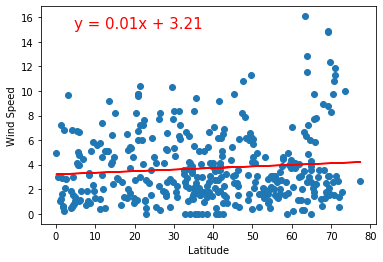

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.12275978732484596


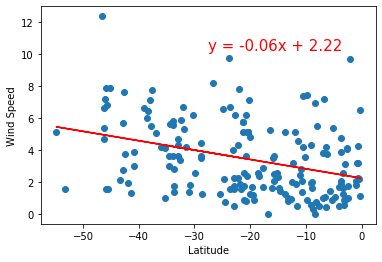

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:** 

Northern Hemisphere: 
 - There is no correlation between Latitude and Wind Speed
 - The r-value is ~ 0.01 (rounded up)

Southern Hemisphere: 
 - There is no correlation between Latitude and Wind Speed
 - The r-value is ~ 0.12 (rounded up)